<h1> STATISTICAL THINKING </h1>
<blockquote>
    <b> Project Description</b> <br>The Millennium Development Goals were a set of 8 goals for 2015 that were defined by the United Nations to help improve living conditions and the conditions of our planet. Key indicators were defined for each of these goals, to see whether they were being met. We will have a look at some of the key indicators from Goal 7: Ensure environmental sustainability, namely carbon dioxide emissions, protected land and sea areas, and forests.
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches
sns.set()

In [2]:
df = pd.read_csv('../data/MDG_Export_20191227.csv')

In [3]:
df.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,


In [4]:
print(f'Number of Countries: {df.Country.nunique()}')

Number of Countries: 230


In [5]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
print(f'Null Values: {df.isnull().sum().sum()}')

Null Values: 49804


<blockquote>
The dataframe contains a number of empty strings " ". So I'll convert all those to NaN values. So that the data is more meaningful and useful.  
</blockquote>

In [6]:
for column in df.columns:
    if column[0] in '1234567890':
        missing_values = df[column].isnull().sum()            
        print(f'Column: {column} Missing values: {missing_values}')

Column: 1990 Missing values: 63
Column: 1991 Missing values: 508
Column: 1992 Missing values: 486
Column: 1993 Missing values: 486
Column: 1994 Missing values: 485
Column: 1995 Missing values: 483
Column: 1996 Missing values: 484
Column: 1997 Missing values: 481
Column: 1998 Missing values: 481
Column: 1999 Missing values: 481
Column: 2000 Missing values: 34
Column: 2001 Missing values: 479
Column: 2002 Missing values: 478
Column: 2003 Missing values: 478
Column: 2004 Missing values: 478
Column: 2005 Missing values: 254
Column: 2006 Missing values: 476
Column: 2007 Missing values: 475
Column: 2008 Missing values: 475
Column: 2009 Missing values: 475
Column: 2010 Missing values: 252
Column: 2011 Missing values: 475
Column: 2012 Missing values: 690
Column: 2013 Missing values: 690
Column: 2014 Missing values: 467
Column: 2015 Missing values: 690
Column: 2016 Missing values: 690
Column: 2017 Missing values: 690
Column: 2018 Missing values: 690
Column: 2019 Missing values: 690


In [7]:
for country in df.Country.unique():
    missing_values = sum(df[df.Country==country].isnull().sum())            
    print(f'Country: {country}, Missing values: {missing_values}')
    

Country: Afghanistan, Missing values: 212
Country: Albania, Missing values: 212
Country: Algeria, Missing values: 212
Country: American Samoa, Missing values: 256
Country: Andorra, Missing values: 222
Country: Angola, Missing values: 212
Country: Anguilla, Missing values: 226
Country: Antigua and Barbuda, Missing values: 212
Country: Argentina, Missing values: 212
Country: Armenia, Missing values: 216
Country: Aruba, Missing values: 212
Country: Australia, Missing values: 212
Country: Austria, Missing values: 212
Country: Azerbaijan, Missing values: 216
Country: Bahamas, Missing values: 212
Country: Bahrain, Missing values: 212
Country: Bangladesh, Missing values: 212
Country: Barbados, Missing values: 212
Country: Belarus, Missing values: 216
Country: Belgium, Missing values: 212
Country: Belize, Missing values: 212
Country: Benin, Missing values: 212
Country: Bermuda, Missing values: 212
Country: Bhutan, Missing values: 212
Country: Bolivia, Missing values: 212
Country: Bosnia and He

Country: Uganda, Missing values: 212
Country: Ukraine, Missing values: 216
Country: United Arab Emirates, Missing values: 212
Country: United Kingdom, Missing values: 212
Country: United Republic of Tanzania, Missing values: 212
Country: United States, Missing values: 212
Country: United States Virgin Islands, Missing values: 256
Country: Uruguay, Missing values: 212
Country: Uzbekistan, Missing values: 216
Country: Vanuatu, Missing values: 212
Country: Venezuela, Missing values: 212
Country: Viet Nam, Missing values: 212
Country: Wallis and Futuna Islands, Missing values: 240
Country: Western Sahara, Missing values: 256
Country: Yemen, Missing values: 212
Country: Yugoslavia [former Socialist Federal Republic], Missing values: 266
Country: Zambia, Missing values: 212
Country: Zimbabwe, Missing values: 212


In [8]:
years = []
for column in df.columns:
    if column[0] in '1234567890':
        years.append(column)
        df[column] = df[column].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryCode   690 non-null    int64  
 1   Country       690 non-null    object 
 2   SeriesCode    690 non-null    int64  
 3   MDG           690 non-null    object 
 4   Series        690 non-null    object 
 5   1990          627 non-null    float64
 6   Footnotes     5 non-null      object 
 7   Type          628 non-null    object 
 8   1991          182 non-null    float64
 9   Footnotes.1   0 non-null      object 
 10  Type.1        182 non-null    object 
 11  1992          204 non-null    float64
 12  Footnotes.2   0 non-null      object 
 13  Type.2        204 non-null    object 
 14  1993          204 non-null    float64
 15  Footnotes.3   0 non-null      object 
 16  Type.3        204 non-null    object 
 17  1994          205 non-null    float64
 18  Footnotes.4   0 non-null      

In [10]:
series = {"Proportion of land area covered by forest, percentage":
          sum(df[df.Series=="Proportion of land area covered by forest, percentage"].isnull().sum()),
         "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)":
          sum(df[df.Series=="Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)"].isnull().sum()),
         "Terrestrial and marine areas protected to total territorial area, percentage":
          sum(df[df.Series=="Terrestrial and marine areas protected to total territorial area, percentage"].isnull().sum())}
series_df = pd.DataFrame(data=series,index=[0])
series_df

,"Proportion of land area covered by forest, percentage","Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)","Terrestrial and marine areas protected to total territorial area, percentage"
0,18892,11550,19362


In [11]:
df['1990'].min()

-2999.6

In [12]:
df['1990'].replace(-2999.6,2999.6,inplace=True)

<blockquote>We can see that 1990 contains erraneous data so we'll fix that.</blockquote>

<h3>Who are the top and bottom 5 countries in terms of C02 emissions in 1990 and what are their emissions? How has this changed by 2011?

 </h3>

In [13]:
df['How much it has changed'] = df['2011'] - df['1990']

co2_emissions = df[['SeriesCode', 'Series','Country', '1990', 'How much it has changed']].copy()
co2_emissions = df[(df['SeriesCode']== 749)].copy()

In [14]:
values={}
for year in years:
        values[year] = co2_emissions[year].mean()

In [15]:
co2_emissions.fillna(value=values,inplace=True)

<h3>Top 5 Countries

 </h3>

In [16]:
top = co2_emissions.sort_values('1990', axis=0, ascending=False, kind='quicksort', na_position='last')
top_5_1990 = top[['Country', '1990']]
top_5_1990.head(5)

,Country,1990
652,United States,4823557.1
124,China,2460744.0
301,Japan,1094287.8
277,India,690576.8
646,United Kingdom,555902.5


In [17]:
top_5_2011 = top[['Country', '2011']]
top_5_2011.head(5)

,Country,2011
652,United States,5305569.6
124,China,9019518.2
301,Japan,1187657.0
277,India,2074344.9
646,United Kingdom,448235.7


In [18]:
top_5_2011 = top[['Country', 'How much it has changed']]
top_5_2011.head(5)

,Country,How much it has changed
652,United States,482012.5
124,China,6558774.2
301,Japan,93369.2
277,India,1383768.1
646,United Kingdom,-107666.8


<h3>Bottom 5 Countries

 </h3>

In [19]:
bottom = co2_emissions.sort_values('1990', axis=0, ascending=True, kind='quicksort', na_position='last')
bottom_5_1990 = bottom[['Country', '1990']]
bottom_5_1990.head(5)

,Country,1990
445,Niue,3.7
505,Saint Helena,7.3
559,Somalia,18.3
142,Cook Islands,22.0
313,Kiribati,22.0


In [20]:
bottom_5_2011 = bottom[['Country','2011']]
bottom_5_2011.head(5)

,Country,2011
445,Niue,11.0
505,Saint Helena,11.0
559,Somalia,575.7
142,Cook Islands,69.7
313,Kiribati,62.3


In [21]:
bottom_5_2011 = bottom[['Country', 'How much it has changed']]
bottom_5_2011.head(5)

,Country,How much it has changed
445,Niue,7.3
505,Saint Helena,3.7
559,Somalia,557.4
142,Cook Islands,47.7
313,Kiribati,40.3


<blockquote>
The top 5 and bottom contries remain the same. The countries in the top 5 are all developed countries and rely on many industrial processes.They have greater populations and more people using things like electricity and driving cars. In China we know they have lot's of factories which creates a huge amount of carbon emmissions. In the bottom 5 we have third world countries. Where some have smaller populations, but mainly they don't rely on technology as much as the top 5 countries. Therefore they produce less carbon emmisions. The UK was the only country that saw a decrease in carbon emissions.
</blockquote>

<h3> Calculate the mean and median C02 emissions for 1990. Why do you think these values differ? </h3>

In [22]:
mean = co2_emissions['1990'].mean()
median = co2_emissions['1990'].median()

print(f'Mean: {mean}\nMedian: {median}')

Mean: 91078.14806629832
Median: 11580.35


<blockquote>
These values differ because the mean gives us the average for all the values and the median gives us the value at the center of all the data arranged in ascending order. These values are used to measure the central tendency of the data. Here the mean is significantly higher than the median. This tells us that there are outliers present in the data cause the value to be that high.
  </blockquote>

<h3>
Calculate the minimum, maximum and interquartile range of the CO2 emissions for 1990. Using this information, and the mean and median, what does this tell you about the distribution of CO2 emissions?  
</h3>

min: 3.7
max: 4823557.1
IQR: 90207.24806629829


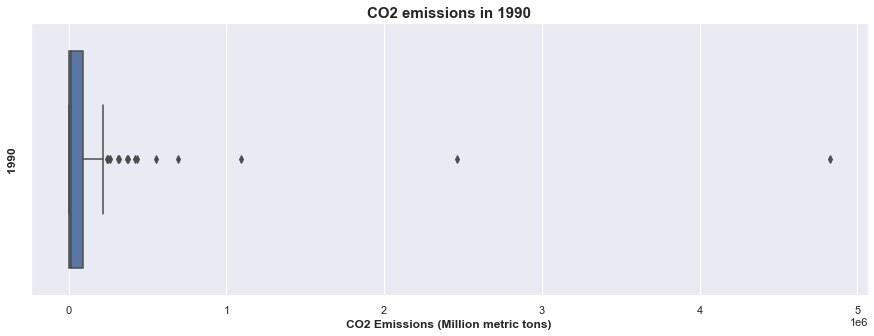

In [23]:
minimum = co2_emissions['1990'].min()
maximum = co2_emissions['1990'].max()
iqr = stats.iqr(co2_emissions['1990'],nan_policy='omit')

plt.figure(figsize=(15, 5))
ax = sns.boxplot(x=co2_emissions['1990'])
plt.title('CO2 emissions in 1990', fontweight='bold', size=15)
plt.xlabel('CO2 Emissions (Million metric tons)', fontweight='bold')
plt.ylabel('1990', fontweight='bold')
print(f'min: {minimum}\nmax: {maximum}\nIQR: {iqr}')

<blockquote>
The diagram is skewed to the right meaning most of the values are above the median. There are also extreme outliers.
  </blockquote>

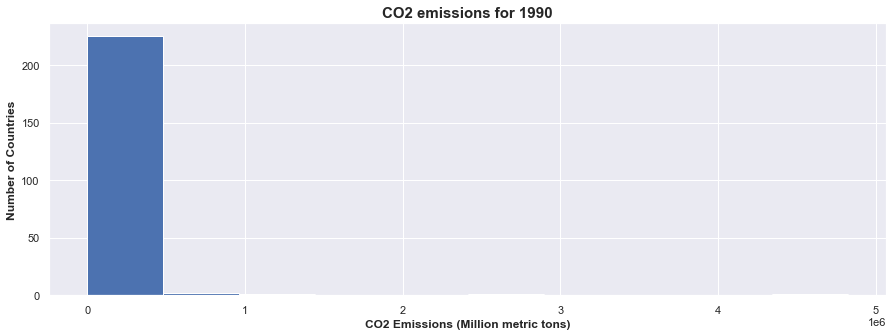

In [24]:
plt.figure(figsize=(15, 5))
plt.hist(co2_emissions['1990'], histtype='barstacked')
plt.title('CO2 emissions for 1990', fontweight='bold', size=15)
plt.xlabel('CO2 Emissions (Million metric tons)', fontweight='bold')
plt.ylabel('Number of Countries', fontweight='bold')
plt.show()

<blockquote>
    Most countries emit a maximum of 500 000 metric tons of CO2.
  </blockquote>

<h3>Calculate the standard deviation and standard error of the mean for CO2 emissions in 1990. How is the standard error different from the standard deviation?

</h3>

In [25]:
deviation = np.std(co2_emissions['1990'])
error_mean = np.std(co2_emissions['1990'], ddof=1) / np.sqrt(np.size(co2_emissions['1990']))

print(f'Standard deviation : {deviation} \nStandard error of the mean: {error_mean}')

Standard deviation : 368670.4221403898 
Standard error of the mean: 24362.42723879995


<blockquote>
The standard deviation measures the amount of variability, or dispersion, from the individual data values to the mean, while the standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean. Our standard deviation is pretty high in comparison to the mean, indictating high variability in the dataset. Looking at the standard error mean we can see that it is likely that theres a significant difference between the population mean and the mean if the dataset.
</blockquote>

<h3>Create a line graph to show C02 emissions in Brazil, Russia, China, India, the USA and South Africa over time. What does the graph tell you about the difference and change in C02 emissions in these countries?</h3>



In [26]:
brazil = [float(number) for number in co2_emissions[co2_emissions.Country=='Brazil'][years].values[0]]
russia = [float(number) for number in co2_emissions[co2_emissions.Country=='Russian Federation'][years].values[0]]
china = [float(number) for number in co2_emissions[co2_emissions.Country=='China'][years].values[0]]
india = [float(number) for number in co2_emissions[co2_emissions.Country=='India'][years].values[0]]
usa = [float(number) for number in co2_emissions[co2_emissions.Country=='United States'][years].values[0]]
sa = [float(number) for number in co2_emissions[co2_emissions.Country=='South Africa'][years].values[0]]

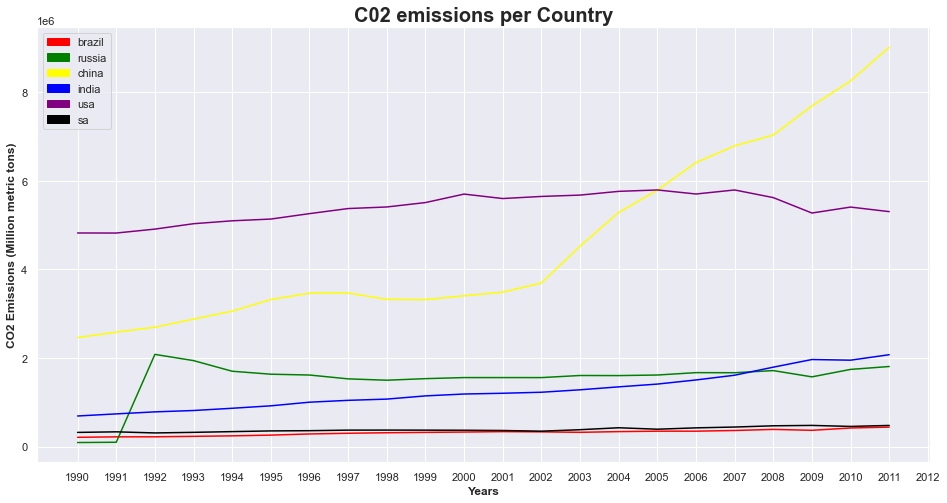

In [27]:
plt.figure(figsize=(16, 8))
sns.lineplot(x = years, y = brazil, color='red')
sns.lineplot(x = years, y = russia, color='green')
sns.lineplot(x = years, y = china, color='yellow')
sns.lineplot(x = years, y = india, color='blue')
sns.lineplot(x = years, y = usa, color='purple')
sns.lineplot(x = years, y = sa, color='black')
plt.title('C02 emissions per Country', fontweight='bold', size=20)
plt.ylabel('CO2 Emissions (Million metric tons)', fontweight='bold')
plt.xlabel('Years', fontweight='bold')
brazil = mpatches.Patch(color='red', label='brazil')
russia = mpatches.Patch(color='green', label='russia')
china = mpatches.Patch(color='yellow', label='china')
india = mpatches.Patch(color='blue', label='india')
usa = mpatches.Patch(color='purple', label='usa')
sa = mpatches.Patch(color='black', label='sa')
plt.legend(handles=[brazil, russia,china,india,usa,sa])
plt.show()


<blockquote>
China and the United States both produce the most carbon dioxide. With Brazil and South Africa producing the least.
</blockquote>

<h3>What is the mean and standard deviation for land area covered by forest in 1990? Why do you think the standard deviation is so large?
</h3>


In [28]:
land_coverage = df[df['SeriesCode']==567].copy()
mean_land_cov = np.mean(land_coverage['1990'])
dev_land_cov = np.std(land_coverage['1990'])
print(f'Mean Land Coverage: {mean_land_cov} \nLand Standard Deviation: {dev_land_cov}')

Mean Land Coverage: 32.97713004484306 
Land Standard Deviation: 25.440278554474926


In [29]:
dictionary={}
for year in years:
        dictionary[year] = land_coverage[year].mean()

In [30]:
land_coverage.fillna(value=dictionary,inplace=True)

<blockquote>
    It makes sense for the standard deviation to be large as land and land size has a wide variety so all of them are likely to be very far from the mean size simply because land is so different.
</blockquote>

<h3>Create histograms for land area covered by forest and percentage of area protected in 1990. Describe the distributions.
</h3>


In [31]:
protected_area = df[df['SeriesCode']== 616].copy()

In [32]:
dictionary1={}
for year in years:
        dictionary1[year] = protected_area[year].mean()

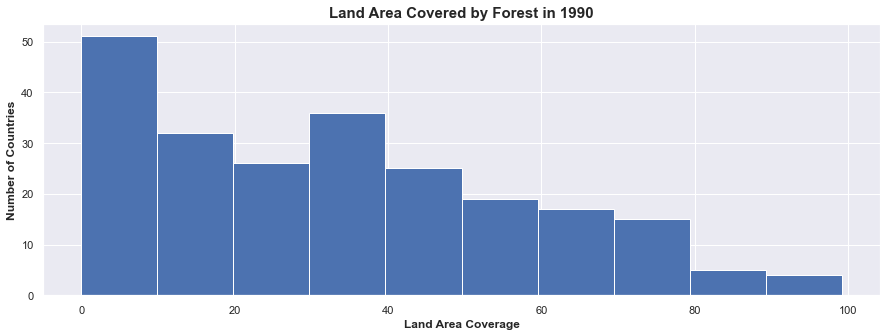

In [33]:
plt.figure(figsize=(15, 5))
plt.hist(land_coverage['1990'])
plt.title('Land Area Covered by Forest in 1990', fontweight='bold', size=15)
plt.xlabel('Land Area Coverage', fontweight='bold')
plt.ylabel('Number of Countries', fontweight='bold')
plt.show()

<blockquote>
When looking at the distribution you can see that the data is skewed to the right. This tell us that there is little forest coverage. Less that then half of the land is covered by a forest.
</blockquote>


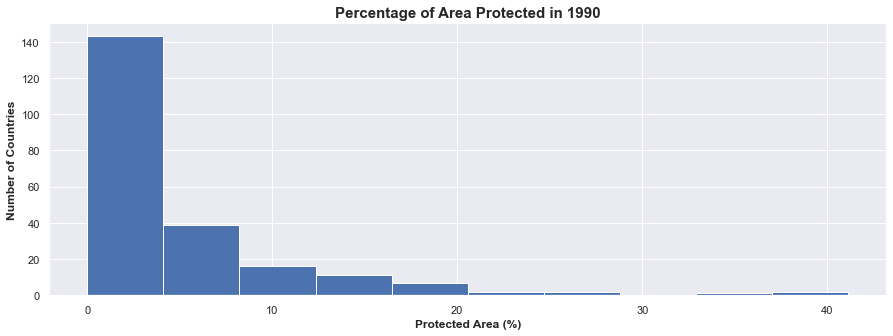

In [34]:
plt.figure(figsize=(15, 5))
plt.hist(protected_area['1990'])
plt.title('Percentage of Area Protected in 1990', fontweight='bold', size=15)
plt.xlabel('Protected Area (%)', fontweight='bold')
plt.ylabel('Number of Countries', fontweight='bold')
plt.show()

<blockquote>
When looking at the distribution you can see that the data is skewed to the right. From what we can see here is that theres an extremely low percentage of areas that are protected.
</blockquote>

<h3>Create a scatterplot with a regression line using seaborn.regplot to show the relationship between the proportion of land area covered by forest and the percentage of area protected in 2000.</h3>

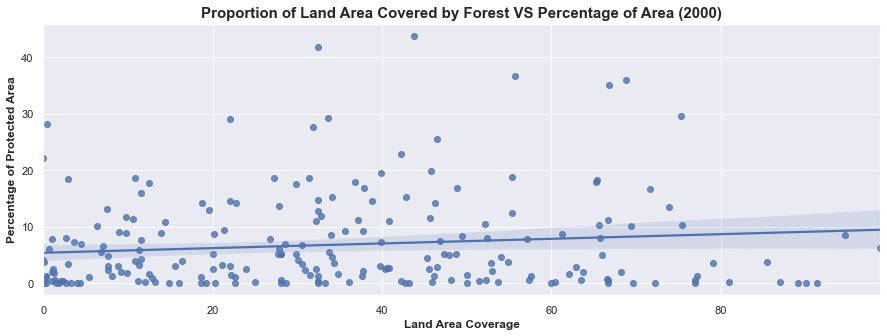

In [35]:
plt.figure(figsize=(15, 5))
ax = sns.regplot(x= land_coverage['2000'], y =protected_area['2000'])
plt.title('Proportion of Land Area Covered by Forest VS Percentage of Area (2000)', fontweight='bold', size=15)
plt.ylabel('Percentage of Protected Area', fontweight='bold')
plt.xlabel('Land Area Coverage', fontweight='bold')
plt.show()

<blockquote>
    <b>What is the relationship between these two variables?</b> <br>
    Looking at the graph above there seems to be a very weak, almost non-existent positive relationship. <br> 
    <b>Describe any patterns in the scatterplot.</b> <br>
    Most areas seem to have very little to no protected areas. <br>
    <b>Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?).</b> <br>
    There are a few places where they have more than 30% protected areas. This is a drastic difference in comparison to all the other values that we are seeing. Below we'll have a look at who they are.
</blockquote>

In [36]:
df[(df['2000'] >= 30) & (df['SeriesCode']== 616)]['Country']

71                                             Bhutan
128    China, Hong Kong Special Administrative Region
347                                     Liechtenstein
668                                         Venezuela
686                                            Zambia
Name: Country, dtype: object

<h3>Since neither forested land area nor protected area is normally distributed, we will need to log transform these variables in order to calculate a correlation coefficient. Log transform the variables and show the transformed distributions in a histogram.</h3>

In [37]:
np.seterr(divide = 'ignore') 
land_coverage['1990_land_log'] = np.log(land_coverage['1990'])
protected_area['1990_protected_log'] = np.log(protected_area['1990'])
area_log=land_coverage[np.isfinite(land_coverage['1990_land_log'])]['1990_land_log']
protected_area_log=protected_area[np.isfinite(protected_area['1990_protected_log'])]['1990_protected_log']

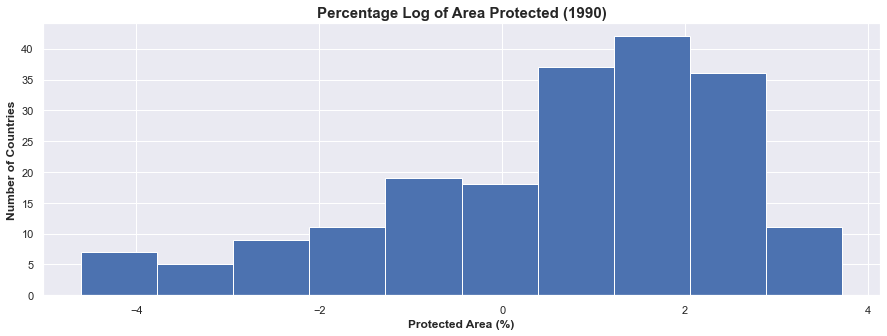

In [38]:
plt.figure(figsize=(15, 5))
plt.hist(protected_area_log)
plt.title('Percentage Log of Area Protected (1990)', fontweight='bold', size=15)
plt.xlabel('Protected Area (%)', fontweight='bold')
plt.ylabel('Number of Countries', fontweight='bold')
plt.show()

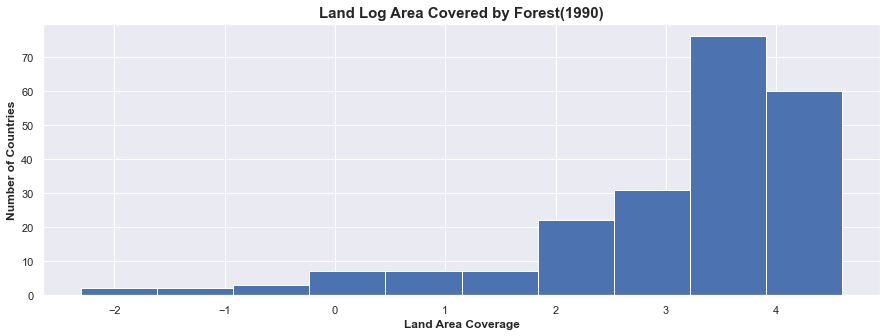

In [39]:
plt.figure(figsize=(15, 5))
plt.hist(area_log)
plt.title('Land Log Area Covered by Forest(1990)', fontweight='bold', size=15)
plt.xlabel('Land Area Coverage', fontweight='bold')
plt.ylabel('Number of Countries', fontweight='bold')
plt.show()

<h3>Using the pearsonr function from the scipy.stats module, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between proportion of land area covered by forest and the percentage of area protected (as measured in 1990 and log transformed). See help(pearsonr) for help on this function.</h3>

In [40]:
area_log = area_log.iloc[:-22]
correlation, p_value = stats.pearsonr(area_log, protected_area_log)
print(f'Pearson’s correlation coefficient: {correlation} \nP-value: {p_value}')

Pearson’s correlation coefficient: 0.08332605848156083 
P-value: 0.24681534541253594


<blockquote>
    <b>Interpret the size and direction of the correlation statistic.</b> <br>
    Looking at the correlation coefficient, I think it's safe to say that there's technically no linear relationship. <br> 
    <b>Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.</b> <br>
    The relationship is not statistically significant as it is above the 0.05 threshold.
</blockquote>

<h3>Calculate the Spearman Rank-Order Correlation Coefficient. This test only looks at the order of the categories, not the values. The Spearman Rank-Order Coefficient is therefore not influenced by non-normality of variables or outliers. How do the results of this test compare the results of the Pearson’s correlation?</h3>

In [41]:
correlation, p_value = stats.spearmanr(area_log, protected_area_log)
print(f'Spearman Correlation Coefficient: {correlation}\nP-value: {p_value}')

Spearman Correlation Coefficient: 0.0544523548013396
P-value: 0.44961429976244793


<blockquote>
These results arrive at the same conclusion as the pearson correlations that there is no relationship. The p-value is telling us that none of the data is correlated.
</blockquote>